In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [2]:
data = pd.read_csv("rock_mine_synthetic_2500.csv")

print("Shape:", data.shape)
print(data.head())


Shape: (2500, 61)
         F1        F2        F3        F4        F5        F6        F7  \
0  0.855838  0.748207  0.568638  0.666678  0.841112  0.810235  0.740757   
1  0.239502  0.297491  0.314860  0.364105  0.140992  0.321101  0.406195   
2  0.224804  0.320390  0.204963  0.263205  0.345012  0.249264  0.277190   
3  0.816816  0.913511  0.872607  0.672196  0.709514  0.644654  0.566558   
4  0.671953  0.780210  0.666374  0.596387  0.551192  0.731111  0.637687   

         F8        F9       F10  ...       F52       F53       F54       F55  \
0  0.836393  0.575727  0.640683  ...  0.836937  0.683037  0.717942  0.666133   
1  0.239749  0.289054  0.113651  ...  0.167063  0.269605  0.384927  0.213015   
2  0.272703  0.256672  0.190353  ...  0.366233  0.418704  0.298423  0.368945   
3  0.840967  0.573127  0.699159  ...  0.755894  0.657082  0.683540  0.560776   
4  0.902717  0.705334  0.622201  ...  0.809092  0.687255  0.845666  0.616402   

        F56       F57       F58       F59       F6

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Dense(
    8,
    activation='relu',
    kernel_regularizer=l2(0.01),
    input_shape=(X_train.shape[1],)
))
model.add(Dropout(0.5))

model.add(Dense(
    4,
    activation='relu',
    kernel_regularizer=l2(0.01)
))
model.add(Dropout(0.4))

model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [46]:
import numpy as np
import pandas as pd

np.random.seed(42)

rows = 2500
features = 30

rock_features = np.random.normal(
    loc=0.0,
    scale=1.5,
    size=(rows // 2, features)
)

mine_features = np.random.normal(
    loc=1.0,
    scale=1.5,
    size=(rows // 2, features)
)

rock_features += np.random.normal(0, 0.7, rock_features.shape)
mine_features += np.random.normal(0, 0.7, mine_features.shape)

rock_labels = np.zeros((rows // 2, 1))
mine_labels = np.ones((rows // 2, 1))

X = np.vstack((rock_features, mine_features))
y = np.vstack((rock_labels, mine_labels))

columns = [f"feature_{i+1}" for i in range(features)]
df = pd.DataFrame(X, columns=columns)
df["label"] = y.astype(int)

df = df.sample(frac=1).reset_index(drop=True)

df.to_csv("/content/rock_mine_synthetic_2500.csv", index=False)

print("Dataset created:", df.shape)
print(df.head())


Dataset created: (2500, 31)
   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0  -0.032863   2.660129   3.533085  -0.670051  -0.619050   1.331757   
1   1.857421   0.386193   0.353333  -2.026257   1.411464   0.853511   
2  -1.097359   1.190563   1.459819   0.047180   0.612221  -1.369329   
3  -1.224233  -1.031839   0.418669  -0.725420  -2.362549   0.905880   
4   1.200127  -1.839782   1.586858  -0.486316   1.945419   4.370340   

   feature_7  feature_8  feature_9  feature_10  ...  feature_22  feature_23  \
0   2.438037   0.197320   1.039275    0.880131  ...    0.346265    1.597797   
1  -1.063517   0.535069   1.347219    2.362287  ...   -0.123180    0.350869   
2   1.994410   2.688749   1.521342    0.281431  ...    2.055244    3.755783   
3  -2.108359   2.097313  -0.396427    3.000679  ...   -2.324810    2.613750   
4  -0.487558   2.539214   0.782092   -0.668477  ...    3.142769    1.002824   

   feature_24  feature_25  feature_26  feature_27  feature_28  feature

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [51]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6001 - loss: 0.6925 - val_accuracy: 0.8900 - val_loss: 0.4109
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8383 - loss: 0.4192 - val_accuracy: 0.9475 - val_loss: 0.2107
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9042 - loss: 0.2794 - val_accuracy: 0.9600 - val_loss: 0.1415
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9187 - loss: 0.2164 - val_accuracy: 0.9600 - val_loss: 0.1268
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9365 - loss: 0.1692 - val_accuracy: 0.9600 - val_loss: 0.1209
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9414 - loss: 0.1671 - val_accuracy: 0.9600 - val_loss: 0.1161
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9401 - loss: 0.1602 - val_accuracy: 0.9625 - val_loss: 0.1191
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9499 - loss: 0.1433 - val_accuracy: 0.

In [52]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", round(accuracy, 2))


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9539 - loss: 0.1352  
Test Accuracy: 0.94


In [53]:
print(len(X_train), len(X_test))
print(set(map(tuple, X_train)) & set(map(tuple, X_test)))


2000 500
set()


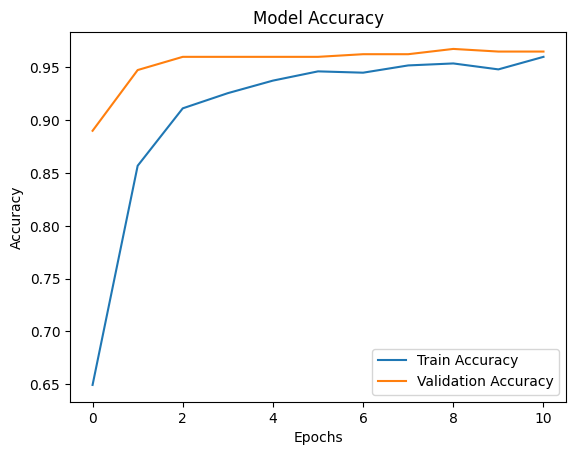

In [54]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train Accuracy", "Validation Accuracy"])
plt.show()


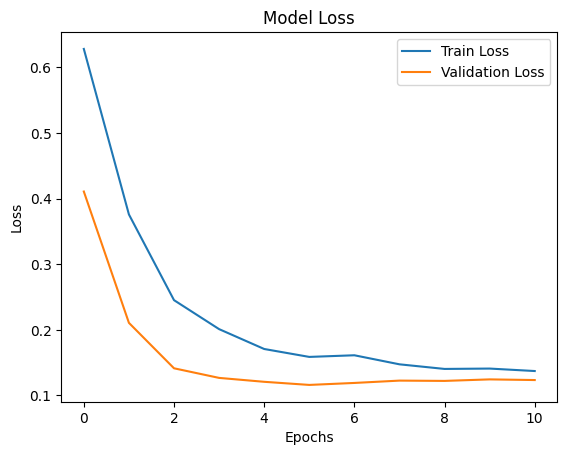

In [55]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train Loss", "Validation Loss"])
plt.show()


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


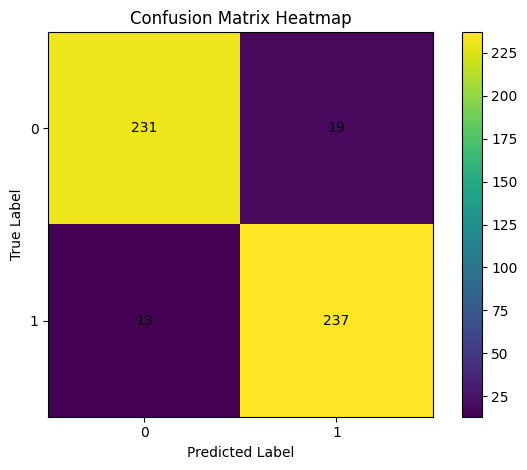

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Predict labels
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.colorbar()

# Axis ticks
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])

# Write values inside cells
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()


In [57]:
rows, columns = X.shape
print("Number of rows:", rows)
print("Number of columns:", columns)


Number of rows: 2500
Number of columns: 30


In [58]:
print("Number of rows:", X.shape[0])
print("Number of columns:", X.shape[1])


Number of rows: 2500
Number of columns: 30


In [32]:
print("Number of target rows:", len(y))


Number of target rows: 2500


In [59]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (2000, 30)
X_test shape: (500, 30)
y_train shape: (2000, 1)
y_test shape: (500, 1)


In [60]:
print("Confusion matrix shape:", cm.shape)


Confusion matrix shape: (2, 2)


In [61]:
# Predict probabilities
y_prob = model.predict(X_test)

# Convert probability to class (0 or 1)
y_pred = (y_prob > 0.5).astype(int)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [62]:
labels = {0: "Rock", 1: "Mine"}

for i in range(5):  # check first 5 test samples
    print(
        "Actual:", labels[y_test[i][0]],
        "| Predicted:", labels[y_pred[i][0]]
    )

Actual: Rock | Predicted: Rock
Actual: Mine | Predicted: Mine
Actual: Mine | Predicted: Mine
Actual: Mine | Predicted: Mine
Actual: Mine | Predicted: Mine


In [64]:
import numpy as np

# Example input (replace with real values that match the 30 features of the model)
# The original error was due to new_sample having 6 features, but the model expects 30.
new_sample = np.array([
    0.6949002694098494, 0.7044352375452988, 0.7297780164972596, 0.7538276039582664, 0.6823331595721268, 0.7312751588647114, 0.6733863668439642, 0.7581974365922535, 0.5651382839083505, 0.6306086091394844, 0.73275090954669, 0.7730706449409989, 0.6858173655890138, 0.6652888500474149, 0.6776482507081089, 0.61293101093024, 0.6768608688465383, 0.8055545750483182, 0.6892947072795529, 0.6721061061523139, 0.6816418909570778, 0.8812079576013718, 0.786863488152278, 0.7859720469104355, 0.753947194235125, 0.7558469311065757, 0.7867582890239395, 0.8746583033343056, 0.7200596286326297, 0.7213934759760259
]).reshape(1, -1)

# Scale using SAME scaler
new_sample = scaler.transform(new_sample)

# Predict
prob = model.predict(new_sample)[0][0]
pred = 1 if prob > 0.5 else 0

print("Prediction Probability:", round(prob, 3))
print("Result:", labels[pred])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Prediction Probability: 0.928
Result: Mine
